# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Импортируем необходимые библиотеки, если они не были импортированы ранее
import pandas as pd
import numpy as np
from IPython.display import display # Для красивого вывода таблиц в Jupyter

# Загрузка данных
try:
    df_churn = pd.read_csv('telecom_churn.csv')
    print("Данные успешно загружены.")

    # Вывод первых 5 строк данных
    print("\nПервые 5 строк данных:")
    display(df_churn.head())

    # Вывод информации о датасете
    print("\nИнформация о датасете:")
    df_churn.info(verbose=True)

    # Вывод статистики по числовым признакам
    print("\nСтатистика по числовым признакам:")
    display(df_churn.describe())

    # Проверка пропущенных значений
    print("\nПроверка пропущенных значений:")
    print(df_churn.isnull().sum())

    # Проверка на дубликаты
    print(f"\nКоличество дубликатов: {df_churn.duplicated().sum()}")

    # Распределение целевой переменной 'Churn'
    print("\nРаспределение целевой переменной 'Churn':")
    print(df_churn['Churn'].value_counts(normalize=True))

except FileNotFoundError:
    print("Ошибка: Файл 'telecom_churn.csv' не найден.")
    print("Пожалуйста, убедитесь, что он находится в той же папке, что и ноутбук, или укажите правильный путь.")
    # В реальном сценарии можно было бы прервать выполнение или запросить путь
except Exception as e:
    print(f"Произошла ошибка при загрузке или обработке данных: {e}")


Данные успешно загружены.

Первые 5 строк данных:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night char

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000



Проверка пропущенных значений:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Количество дубликатов: 0

Распределение целевой переменной 'Churn':
Churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


In [3]:
# Импортируем необходимые классы из scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Проверяем, загружен ли датафрейм
if 'df_churn' in locals() and df_churn is not None:

    # 1. Преобразование целевой переменной 'Churn' в числовой формат (0/1)
    df_churn['Churn'] = df_churn['Churn'].map({False: 0, True: 1}).fillna(-1) # fillna на случай других значений
    if (df_churn['Churn'] == -1).any():
        print("Внимание: В колонке 'Churn' найдены неожиданные значения.")
    else:
        print("Колонка 'Churn' успешно преобразована в числовой формат (0/1).")

    # 2. Отделение признаков (X) и целевой переменной (y)
    X = df_churn.drop('Churn', axis=1)
    y = df_churn['Churn']

    # 3. Определение числовых и категориальных признаков
    # Исключаем неинформативные или уже обработанные колонки, если они есть
    # 'State' может иметь слишком много категорий, пока оставим. 'Area code' часто трактуют как категориальный.
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns

    # 'Area code' по сути категориальный
    # Убираем из числовых и добавляем в категориальные
    numerical_features = numerical_features.drop('Area code')
    categorical_features = categorical_features.append(pd.Index(['Area code']))
    print("Признак 'Area code' будет обработан как категориальный.")

    print(f"\nЧисловые признаки ({len(numerical_features)}): {list(numerical_features)}")
    print(f"Категориальные признаки ({len(categorical_features)}): {list(categorical_features)}")

    # 4. Создание препроцессора для колонок
    # StandardScaler для числовых, OneHotEncoder для категориальных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features) # drop='first' для избежания мультиколлинеарности
        ],
        remainder='passthrough' # Оставляет столбцы, не указанные в transformers (на всякий случай)
    )

    # 5. Разделение данных на обучающую и тестовую выборки (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify=y важен для несбалансированных данных

    print(f"\nРазмеры выборок:")
    print(f"X_train: {X_train.shape}")
    print(f"X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"y_test: {y_test.shape}")

    # Теперь X_train и X_test можно передавать в pipeline с препроцессором и моделью
    # Пример того, как будут выглядеть обработанные данные (первые 5 строк):
    print("\nПример обработанных данных (обучающая выборка):")
    X_train_processed = preprocessor.fit_transform(X_train)[0]
    print(X_train_processed) # Выведет numpy массив или sparse matrix

else:
    print("Датафрейм 'df_churn' не найден или не был загружен. Предобработка невозможна.")


Колонка 'Churn' успешно преобразована в числовой формат (0/1).
Признак 'Area code' будет обработан как категориальный.

Числовые признаки (15): ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Категориальные признаки (4): ['State', 'International plan', 'Voice mail plan', 'Area code']

Размеры выборок:
X_train: (2333, 19)
X_test: (1000, 19)
y_train: (2333,)
y_test: (1000,)

Пример обработанных данных (обучающая выборка):
  (0, 0)	0.7107296073736828
  (0, 1)	-0.6014371722413446
  (0, 2)	-0.7452035003922497
  (0, 3)	0.9346111714291292
  (0, 4)	-0.7447193783515812
  (0, 5)	1.7206331683030374
  (0, 6)	0.23587116160805816
  (0, 7)	1.7204933491284526
  (0, 8)	-1.4264100691856405
  (0, 9)	-0.15635164940678098
  (0, 10)	-1.42772

In [11]:
# Импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline

# Создаем пайплайн, который включает препроцессор и модель
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Определяем сетку гиперпараметров для поиска
param_grid = [
    # Комбинации для солверов, поддерживающих L1 и L2
    {'classifier__solver': ['liblinear', 'saga'],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': [0.1, 1, 10, 100, 1000, 10000],
     'classifier__max_iter': [1000]},
    # Комбинации для солверов, поддерживающих только L2
    {'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
     'classifier__penalty': ['l2'],
     'classifier__C': [0.1, 1, 10, 100, 1000, 10000],
     'classifier__max_iter': [1000]}
]

# Создаем объект GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # количество фолдов для кросс-валидации
    scoring='f1',  # метрика для оптимизации
    n_jobs=4,  # использовать 4 ядра
    verbose=1  # вывод информации о процессе
)

# Обучаем модель с подбором гиперпараметров
print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры
print("\nЛучшие параметры:")
print(grid_search.best_params_)

# Оцениваем качество модели на тестовой выборке
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nМетрики на тестовой выборке:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Выводим подробный отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Анализируем переобучение
print("\nАнализ переобучения:")
print(f"F1-score на обучающей выборке: {grid_search.best_score_:.4f}")
print(f"F1-score на тестовой выборке: {f1:.4f}")

# Выводим коэффициенты важности признаков
print("\nВажность признаков:")
feature_names = (numerical_features.tolist() + 
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())
coef = grid_search.best_estimator_.named_steps['classifier'].coef_[0]

# Сортируем признаки по важности
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': coef
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))  # Топ-10 самых важных признаков

Начинаем подбор гиперпараметров...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

Лучшие параметры:
{'classifier__C': 1000, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Метрики на тестовой выборке:
Accuracy: 0.8710
F1-score: 0.3944
ROC-AUC: 0.7811

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       855
           1       0.62      0.29      0.39       145

    accuracy                           0.87      1000
   macro avg       0.75      0.63      0.66      1000
weighted avg       0.85      0.87      0.85      1000


Анализ переобучения:
F1-score на обучающей выборке: 0.3574
F1-score на тестовой выборке: 0.3944

Важность признаков:
                   feature  importance
13       Total intl charge    8.959957
65  International plan_Yes    2.242738
40                State_MT    1.721981
18                State_CA    1.599403
54                Stat

Низкий показатель F1 при высоком Accuracy и среднем ROC-AUC говорит о том, что модель модель способна к верной классификации в некоторых случаях, но есть проблемы с полнотой. Скорее всего идёт перегиб в сторону False что даёт статистический выигрыш 

In [13]:
# Импортируем SVC (Support Vector Classifier)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline

# Создаем пайплайн для SVM
# Важно: probability=True добавляет дополнительный слой логистической регрессии на выходные данные 
# о расстояниях от гиперплоскостей
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor), # Используем тот же препроцессор
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
])

# Определяем сетку гиперпараметров для поиска (только C для линейного SVM)
param_grid_svm = {
    'classifier__C': [0.01, 0.1, 1, 10, 100] # Параметр регуляризации
}

# Создаем объект GridSearchCV для SVM
grid_search_svm = GridSearchCV(
    pipeline_svm,
    param_grid_svm,
    cv=5,            # 5-фолдовая кросс-валидация
    scoring='f1',    # Оптимизируем по F1-score
    n_jobs=12,        # Используем 4 ядра
    verbose=1        # Выводим информацию
)

# Обучаем модель SVM с подбором гиперпараметров
print("Начинаем подбор гиперпараметров для SVM...")
grid_search_svm.fit(X_train, y_train)

# Выводим лучшие параметры для SVM
print("\nЛучшие параметры для SVM:")
print(grid_search_svm.best_params_)

# Оцениваем качество лучшей модели SVM на тестовой выборке
y_pred_svm = grid_search_svm.predict(X_test)
y_pred_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]

# Вычисляем метрики для SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print("\nМетрики SVM на тестовой выборке:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")
print(f"ROC-AUC: {roc_auc_svm:.4f}")

# Выводим подробный отчет о классификации для SVM
print("\nОтчет о классификации SVM:")
print(classification_report(y_test, y_pred_svm))

# Анализ переобучения для SVM
print("\nАнализ переобучения SVM:")
print(f"F1-score на обучающей выборке (CV best score): {grid_search_svm.best_score_:.4f}")
print(f"F1-score на тестовой выборке: {f1_svm:.4f}")

# Сравнение с логистической регрессией (просто вывод метрик для наглядности)
print("\n--- Сравнение с Логистической регрессией ---")
print(f"Лог. регрессия F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print(f"SVM F1: {f1_svm:.4f}, ROC-AUC: {roc_auc_svm:.4f}")

Начинаем подбор гиперпараметров для SVM...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Лучшие параметры для SVM:
{'classifier__C': 100}

Метрики SVM на тестовой выборке:
Accuracy: 0.8550
F1-score: 0.0000
ROC-AUC: 0.7835

Отчет о классификации SVM:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       855
           1       0.00      0.00      0.00       145

    accuracy                           0.85      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.85      0.79      1000


Анализ переобучения SVM:
F1-score на обучающей выборке (CV best score): 0.0278
F1-score на тестовой выборке: 0.0000

--- Сравнение с Логистической регрессией ---
Лог. регрессия F1: 0.3944, ROC-AUC: 0.7811
SVM F1: 0.0000, ROC-AUC: 0.7835


a:\edu\instrumental-tools\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\edu\instrumental-tools\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\edu\instrumental-tools\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Переобучения не случилось. Модель просто всегда ставит самое частое значение: False. Данный метод не подходит для этой задачи.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# 1. Создаем новый пайплайн с PolynomialFeatures
pipeline_poly = Pipeline([
    ('preprocessor', preprocessor), # Шаг 1: Масштабирование и OHE
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # Шаг 2: Генерация полиномиальных признаков
    ('classifier', LogisticRegression(random_state=42, max_iter=1000)) # Шаг 3: Классификатор (увеличим max_iter сразу)
])

# 2. Определяем сетку параметров для Logistic Regression после добавления полиномов
# Попробуем значения C вокруг предыдущего лучшего (1000) и меньше,
# так как число признаков выросло, может понадобиться регуляризация посильнее.
param_grid_poly = [
    # liblinear/saga с L1/L2
    {'classifier__solver': ['liblinear', 'saga'],
     'classifier__penalty': ['l1', 'l2'],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10]}, # Уменьшили диапазон C
    # Остальные солверы с L2
    {'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
     'classifier__penalty': ['l2'],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10]}
]

# 3. Создаем и обучаем GridSearchCV
grid_search_poly = GridSearchCV(
    pipeline_poly,
    param_grid_poly,
    cv=5,
    scoring='f1',
    n_jobs=12,
    verbose=2 # Увеличим verbose для отслеживания
)

print("Начинаем подбор гиперпараметров для модели с полиномиальными признаками...")
grid_search_poly.fit(X_train, y_train)

# 4. Выводим лучшие параметры и оцениваем модель
print("\nЛучшие параметры (с полиномиальными признаками):")
print(grid_search_poly.best_params_)

y_pred_poly = grid_search_poly.predict(X_test)
y_pred_proba_poly = grid_search_poly.predict_proba(X_test)[:, 1]

accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
roc_auc_poly = roc_auc_score(y_test, y_pred_proba_poly)

print("\nМетрики на тестовой выборке (с полиномиальными признаками):")
print(f"Accuracy: {accuracy_poly:.4f}")
print(f"F1-score: {f1_poly:.4f}")
print(f"ROC-AUC: {roc_auc_poly:.4f}")

print("\nОтчет о классификации (с полиномиальными признаками):")
print(classification_report(y_test, y_pred_poly))

print("\nАнализ переобучения (с полиномиальными признаками):")
print(f"F1-score на обучающей выборке (CV best score): {grid_search_poly.best_score_:.4f}")
print(f"F1-score на тестовой выборке: {f1_poly:.4f}")

# 5. Сравнение с предыдущей лучшей моделью (без полиномов)
print("\n--- Сравнение с Лог. регрессией БЕЗ полиномов ---")
# Используем переменные f1 и roc_auc из предыдущего запуска лог.регрессии
print(f"Без полиномов: F1={f1:.4f}, ROC-AUC={roc_auc:.4f}")
print(f"С полиномами:   F1={f1_poly:.4f}, ROC-AUC={roc_auc_poly:.4f}")


Начинаем подбор гиперпараметров для модели с полиномиальными признаками...
Fitting 5 folds for each of 35 candidates, totalling 175 fits

Лучшие параметры (с полиномиальными признаками):
{'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

Метрики на тестовой выборке (с полиномиальными признаками):
Accuracy: 0.8950
F1-score: 0.5783
ROC-AUC: 0.8542

Отчет о классификации (с полиномиальными признаками):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       855
           1       0.69      0.50      0.58       145

    accuracy                           0.90      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.89      0.90      0.89      1000


Анализ переобучения (с полиномиальными признаками):
F1-score на обучающей выборке (CV best score): 0.6171
F1-score на тестовой выборке: 0.5783

--- Сравнение с Лог. регрессией БЕЗ полиномов ---
Без полиномов: F1=0.3944, ROC-AUC=0.78

Использование полиномиальных признаков значительно улучшило качество модели и вывело в лидеры алгоритм libliner

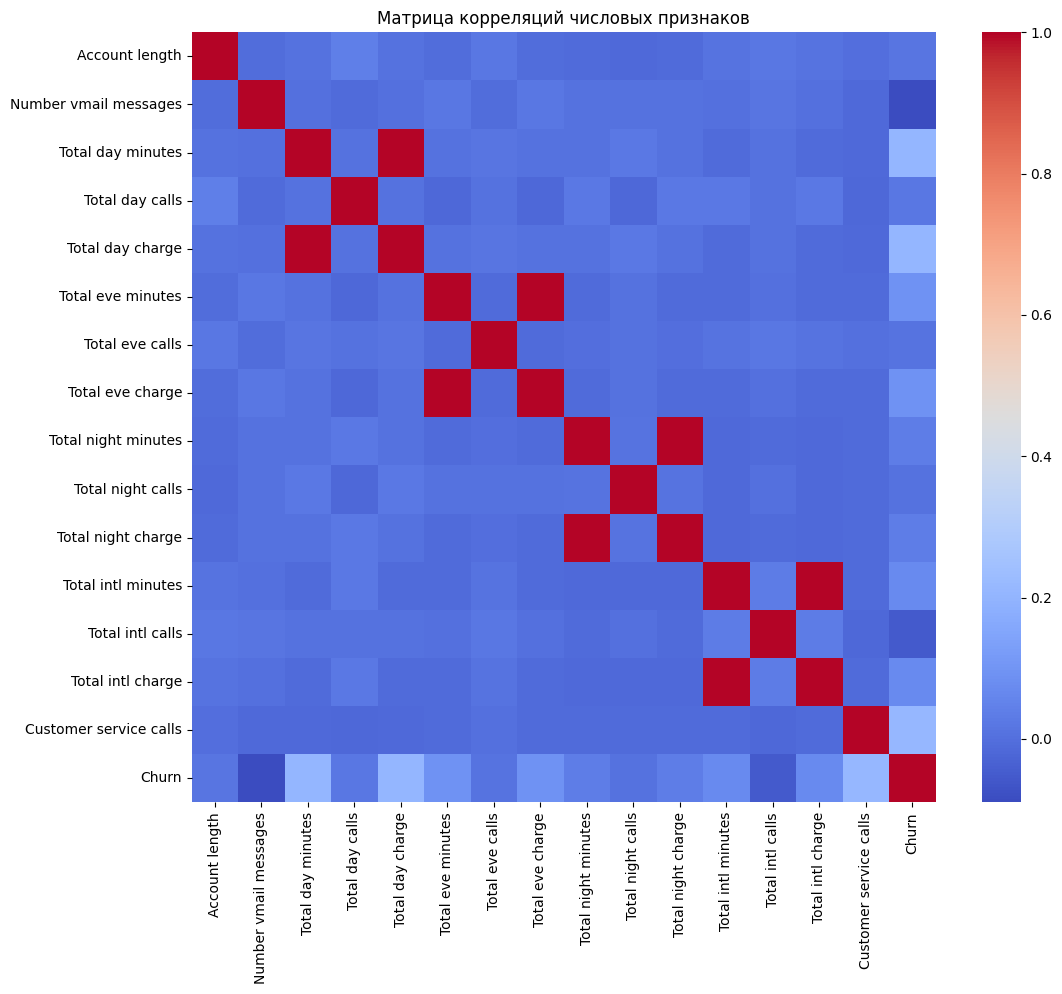


Корреляция числовых признаков с целевой переменной 'Churn':
Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

Признаки с низкой корреляцией с Churn (abs < 0.05): ['Total night charge', 'Total night minutes', 'Total day calls', 'Account length', 'Total eve calls', 'Total night calls']

Пары сильно коррелирующих признаков (abs > 0.9):
- Total day minutes и Total day charge (Корр: 1.000). Удаляем: Total day charge
- Total eve minutes и Total eve charge (Корр:

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Убедимся, что df_churn загружен и 'Churn' преобразован
if 'df_churn' not in locals() or df_churn is None:
    print("Ошибка: Датафрейм 'df_churn' не найден. Пожалуйста, выполните ячейки выше.")
    # Здесь должен быть код загрузки и базовой предобработки, если нужно
    # df_churn = pd.read_csv('telecom_churn.csv')
    # df_churn['Churn'] = df_churn['Churn'].map({False: 0, True: 1})
else:
    # 1. Расчет матрицы корреляций
    # Выбираем только числовые колонки и целевую переменную
    numerical_cols_for_corr = df_churn.select_dtypes(include=np.number).columns.tolist()
    # Убедимся, что 'Area code' не считается числовым для корреляции (он категориальный)
    if 'Area code' in numerical_cols_for_corr:
        numerical_cols_for_corr.remove('Area code')
    # Добавляем Churn, если его нет (уже должен быть числовым 0/1)
    if 'Churn' not in numerical_cols_for_corr:
         numerical_cols_for_corr.append('Churn')

    corr_matrix = df_churn[numerical_cols_for_corr].corr()

    # Визуализация матрицы корреляций
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Матрица корреляций числовых признаков')
    plt.show()

    # Корреляция с целевой переменной 'Churn'
    corr_with_target = corr_matrix['Churn'].sort_values(ascending=False)
    print("\nКорреляция числовых признаков с целевой переменной 'Churn':")
    print(corr_with_target)

    # 2. Анализ корреляций
    # Признаки с низкой корреляцией (например, abs < 0.05)
    low_corr_features = corr_with_target[abs(corr_with_target) < 0.05].index.tolist()
    # Удаляем 'Churn' из этого списка, если он там оказался
    if 'Churn' in low_corr_features: low_corr_features.remove('Churn')
    print(f"\nПризнаки с низкой корреляцией с Churn (abs < 0.05): {low_corr_features}")

    # Пары сильно коррелирующих признаков (например, abs > 0.9)
    # Исключаем диагональные элементы (корреляция признака с самим собой)
    corr_matrix_no_diag = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))
    high_corr_pairs = []
    # Множество для хранения признаков, помеченных на удаление из-за высокой корреляции
    features_to_remove_due_to_high_corr = set()

    # Создаем копию матрицы без диагонали и столбца/строки 'Churn'
    # Работаем с копией, чтобы не изменять оригинальную матрицу корреляций
    corr_matrix_filtered = corr_matrix.drop(index='Churn', columns='Churn', errors='ignore')
    # Заменяем диагональные элементы на NaN или 0, чтобы они не учитывались
    np.fill_diagonal(corr_matrix_filtered.values, np.nan) # Используем NaN

    # Список для хранения пар для информативного вывода
    high_corr_pairs_to_print = []

    # Проходим по всем столбцам (признакам) в отфильтрованной матрице
    for col in corr_matrix_filtered.columns:
        # Если текущий признак 'col' уже помечен на удаление, пропускаем его,
        # так как мы уже нашли пару с ним и решили удалить другой признак из той пары.
        if col in features_to_remove_due_to_high_corr:
            continue

        # Находим признаки ('feature'), которые сильно коррелируют с текущим 'col'
        # и которые еще НЕ помечены на удаление
        highly_correlated_with_col = corr_matrix_filtered.index[
            (abs(corr_matrix_filtered[col]) > 0.9) &
            (~corr_matrix_filtered.index.isin(features_to_remove_due_to_high_corr))
        ].tolist()

        # Если такие признаки найдены
        if highly_correlated_with_col:
            # Мы добавляем найденные признаки ('feature') в список на удаление.
            # Текущий признак 'col' остается.
            features_to_remove_due_to_high_corr.update(highly_correlated_with_col)

            # Сохраняем информацию о парах для вывода
            for feature in highly_correlated_with_col:
                high_corr_pairs_to_print.append((col, feature, corr_matrix.loc[col, feature]))

    # Выводим найденные пары и итоговый список признаков на удаление
    print(f"\nПары сильно коррелирующих признаков (abs > 0.9):")
    if high_corr_pairs_to_print:
        for pair in high_corr_pairs_to_print:
            # Указываем, какой признак удаляется из пары
            removed_feature = pair[1] if pair[1] in features_to_remove_due_to_high_corr else pair[0]
            kept_feature = pair[0] if removed_feature == pair[1] else pair[1]
            print(f"- {pair[0]} и {pair[1]} (Корр: {pair[2]:.3f}). Удаляем: {removed_feature}")
    else:
        print("Сильно коррелирующих пар (abs > 0.9) не найдено.")

    # Объединяем признаки с низкой корреляцией с Churn и один признак из каждой сильно коррелирующей пары
    # low_corr_features должно быть определено ранее
    features_to_drop = list(set(low_corr_features + list(features_to_remove_due_to_high_corr)))
    print(f"\nИтоговые признаки для удаления: {features_to_drop}")

    # 3. Подготовка данных и обучение модели с удаленными признаками

    if not features_to_drop:
        print("\nПризнаки для удаления не найдены. Пропускаем переобучение.")
    else:
        # Определяем новые списки признаков
        X_reduced = X.drop(columns=features_to_drop)

        # Обновляем списки числовых и категориальных признаков
        numerical_features_reduced = numerical_features.drop(features_to_drop, errors='ignore')
        categorical_features_reduced = categorical_features # Категориальные не удаляли

        print(f"\nНовые числовые признаки ({len(numerical_features_reduced)}): {list(numerical_features_reduced)}")
        print(f"Категориальные признаки ({len(categorical_features_reduced)}): {list(categorical_features_reduced)}")

        # Создаем новый препроцессор
        preprocessor_reduced = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features_reduced),
                ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_reduced)
            ],
            remainder='passthrough'
        )

        # Создаем новый пайплайн с полиномиальными признаками (они дали лучший результат ранее)
        pipeline_poly_reduced = Pipeline([
            ('preprocessor', preprocessor_reduced),
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('classifier', LogisticRegression(random_state=42, max_iter=1000)) # Используем те же параметры классификатора
        ])

        # Используем те же параметры GridSearchCV, что и для pipeline_poly
        # Но можно взять лучшие параметры из grid_search_poly для ускорения
        best_params_poly = grid_search_poly.best_params_ if 'grid_search_poly' in locals() else {
            'classifier__C': 0.1, # Значения по умолчанию, если grid_search_poly не запускался
            'classifier__penalty': 'l2',
            'classifier__solver': 'liblinear'
        }
        print(f"\nИспользуем параметры для LogReg: {best_params_poly}")

        # Устанавливаем параметры в пайплайн
        pipeline_poly_reduced.set_params(**best_params_poly)

        # Разделяем новые данные
        X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
            X_reduced, y, test_size=0.3, random_state=42, stratify=y
        )

        # Обучаем модель
        print("\nОбучаем модель с полиномиальными признаками на сокращенном наборе данных...")
        pipeline_poly_reduced.fit(X_train_red, y_train_red)

        # 4. Оценка модели
        y_pred_poly_reduced = pipeline_poly_reduced.predict(X_test_red)
        y_pred_proba_poly_reduced = pipeline_poly_reduced.predict_proba(X_test_red)[:, 1]

        accuracy_poly_reduced = accuracy_score(y_test_red, y_pred_poly_reduced)
        f1_poly_reduced = f1_score(y_test_red, y_pred_poly_reduced)
        roc_auc_poly_reduced = roc_auc_score(y_test_red, y_pred_proba_poly_reduced)

        print("\nМетрики на тестовой выборке (полиномы, сокращенные признаки):")
        print(f"Accuracy: {accuracy_poly_reduced:.4f}")
        print(f"F1-score: {f1_poly_reduced:.4f}")
        print(f"ROC-AUC: {roc_auc_poly_reduced:.4f}")

        print("\nОтчет о классификации (полиномы, сокращенные признаки):")
        print(classification_report(y_test_red, y_pred_poly_reduced))

        # 5. Сравнение результатов
        # Предполагаем, что переменные f1_poly и roc_auc_poly существуют из предыдущего шага (C)
        if 'f1_poly' in locals() and 'roc_auc_poly' in locals():
             print("\n--- Сравнение с моделью с полиномами НА ВСЕХ признаках ---")
             print(f"Все признаки:  F1={f1_poly:.4f}, ROC-AUC={roc_auc_poly:.4f}")
             print(f"Удалены признаки: F1={f1_poly_reduced:.4f}, ROC-AUC={roc_auc_poly_reduced:.4f}")

             if f1_poly_reduced > f1_poly and roc_auc_poly_reduced > roc_auc_poly:
                 print("\nВывод: Удаление признаков УЛУЧШИЛО качество модели.")
             else:
                 print("\nВывод: Удаление признаков НЕ улучшило качество модели.")
        else:
            print("\nНе удалось сравнить с предыдущей моделью (переменные f1_poly/roc_auc_poly не найдены).")


In [27]:
grid_search_poly.best_params_

{'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [28]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [29]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [30]:
# Распределение классов в целевой переменной 'target'
target_counts = df['target'].value_counts()
target_percentages = df['target'].value_counts(normalize=True) * 100

print("Распределение классов в 'target':")
print(target_counts)
print("\nДоля классов в 'target':")
print(target_percentages)

Распределение классов в 'target':
target
0    382
1    307
Name: count, dtype: int64

Доля классов в 'target':
target
0    55.442671
1    44.557329
Name: proportion, dtype: float64


**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [31]:
from sklearn.metrics import accuracy_score

# Вычисляем accuracy для каждого алгоритма
accuracy1 = accuracy_score(df['target'], df['pred1_classes'])
accuracy2 = accuracy_score(df['target'], df['pred2_classes'])
accuracy3 = accuracy_score(df['target'], df['pred3_classes'])

print(f"Accuracy алгоритма 1: {accuracy1:.4f}")
print(f"Accuracy алгоритма 2: {accuracy2:.4f}")
print(f"Accuracy алгоритма 3: {accuracy3:.4f}")

# Находим алгоритм с наибольшей accuracy
accuracies = {'Алгоритм 1': accuracy1, 'Алгоритм 2': accuracy2, 'Алгоритм 3': accuracy3}
best_algorithm = max(accuracies, key=accuracies.get)
max_accuracy = accuracies[best_algorithm]

print(f"\nАлгоритм с наибольшей accuracy: {best_algorithm} (Accuracy = {max_accuracy:.4f})")


Accuracy алгоритма 1: 0.6618
Accuracy алгоритма 2: 0.6720
Accuracy алгоритма 3: 0.6401

Алгоритм с наибольшей accuracy: Алгоритм 2 (Accuracy = 0.6720)


**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [32]:
from sklearn.metrics import precision_score, recall_score

# Истинные метки
y_true = df['target']

# Предсказанные метки для каждого алгоритма
y_pred1 = df['pred1_classes']
y_pred2 = df['pred2_classes']
y_pred3 = df['pred3_classes']

# Вычисляем точность (Precision) для положительного класса (1)
precision1 = precision_score(y_true, y_pred1, pos_label=1)
precision2 = precision_score(y_true, y_pred2, pos_label=1)
precision3 = precision_score(y_true, y_pred3, pos_label=1)

# Вычисляем полноту (Recall) для положительного класса (1)
recall1 = recall_score(y_true, y_pred1, pos_label=1)
recall2 = recall_score(y_true, y_pred2, pos_label=1)
recall3 = recall_score(y_true, y_pred3, pos_label=1)

print("Точность (Precision) для класса 1:")
print(f"Алгоритм 1: {precision1:.4f}")
print(f"Алгоритм 2: {precision2:.4f}")
print(f"Алгоритм 3: {precision3:.4f}")

print("\nПолнота (Recall) для класса 1:")
print(f"Алгоритм 1: {recall1:.4f}")
print(f"Алгоритм 2: {recall2:.4f}")
print(f"Алгоритм 3: {recall3:.4f}")

Точность (Precision) для класса 1:
Алгоритм 1: 0.6907
Алгоритм 2: 0.6104
Алгоритм 3: 0.6903

Полнота (Recall) для класса 1:
Алгоритм 1: 0.4365
Алгоритм 2: 0.7296
Алгоритм 3: 0.3485


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [33]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

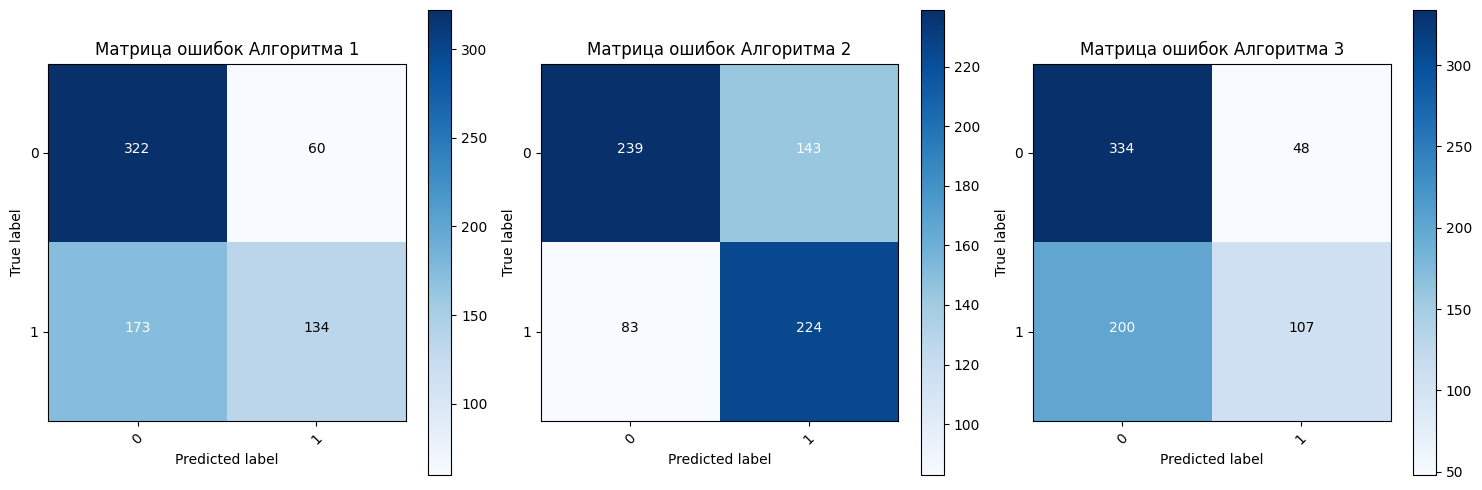

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Истинные метки
y_true = df['target']

# Предсказанные метки
y_pred1 = df['pred1_classes']
y_pred2 = df['pred2_classes']
y_pred3 = df['pred3_classes']

# Классы для отображения на графике
class_names = np.array(['0', '1'])

# Вычисляем матрицы ошибок
cnf_matrix1 = confusion_matrix(y_true, y_pred1)
cnf_matrix2 = confusion_matrix(y_true, y_pred2)
cnf_matrix3 = confusion_matrix(y_true, y_pred3)

# Строим графики матриц ошибок
plt.figure(figsize=(15, 5)) # Размер общего поля для графиков

plt.subplot(1, 3, 1) # Первый график в сетке 1x3
plot_confusion_matrix(cnf_matrix1, classes=class_names,
                      title='Матрица ошибок Алгоритма 1')

plt.subplot(1, 3, 2) # Второй график
plot_confusion_matrix(cnf_matrix2, classes=class_names,
                      title='Матрица ошибок Алгоритма 2')

plt.subplot(1, 3, 3) # Третий график
plot_confusion_matrix(cnf_matrix3, classes=class_names,
                      title='Матрица ошибок Алгоритма 3')

plt.tight_layout() # Чтобы заголовки не перекрывались
plt.show()


Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [ ]:
import numpy as np
import pandas as pd # Добавим импорт pandas, если он не был сделан ранее
from sklearn.metrics import accuracy_score, recall_score

# Убедимся, что df загружен
# df = pd.read_csv("credit_scoring_example1.csv") # Раскомментируйте, если нужно

# Истинные метки
y_true = df['target']

# Вероятности для каждого алгоритма
probs_list = [df['pred1_probs'], df['pred2_probs'], df['pred3_probs']]
algo_names = ['Алгоритм 1', 'Алгоритм 2', 'Алгоритм 3']

# Диапазон порогов для проверки
thresholds = np.arange(0.1, 1.0, 0.01)

print("--- Лучшие пороги для Варианта 1 (Accuracy >= 0.65, Max Recall) ---")

# Словарь для хранения лучших результатов для каждого алгоритма
best_thresholds_results = {}

# Проверяем каждый алгоритм
for i, probs in enumerate(probs_list):
    algo_name = algo_names[i]

    # Переменные для хранения лучшего результата для текущего алгоритма
    best_recall_for_algo = -1 # Инициализируем худшим возможным значением recall
    best_result_for_algo = None

    for threshold in thresholds:
        # Получаем предсказанные классы для текущего порога
        y_pred = (probs >= threshold).astype(int)

        # Вычисляем accuracy и recall
        acc = accuracy_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred, pos_label=1, zero_division=0)

        # Проверяем условие accuracy
        if acc >= 0.65:
            # Если текущий recall лучше лучшего найденного до сих пор
            if rec > best_recall_for_algo:
                best_recall_for_algo = rec # Обновляем лучший recall
                # Сохраняем параметры этого порога
                best_result_for_algo = {'threshold': threshold, 'accuracy': acc, 'recall': rec}

    # Если был найден хотя бы один подходящий порог
    if best_result_for_algo:
        # Сохраняем лучший результат в общий словарь
        best_thresholds_results[algo_name] = best_result_for_algo
    else:
        # Если подходящих порогов не найдено
        best_thresholds_results[algo_name] = None # Отмечаем, что для этого алгоритма порог не найден

# Теперь все лучшие результаты сохранены в словаре best_thresholds_results
print("\n--- Сохраненные лучшие результаты ---")
for algo_name, result in best_thresholds_results.items():
    if result:
        print(f"{algo_name}: Порог={result['threshold']:.2f}, Accuracy={result['accuracy']:.4f}, Recall={result['recall']:.4f}")
    else:
        print(f"{algo_name}: Подходящий порог не найден.")


--- Лучшие пороги для Варианта 1 (Accuracy >= 0.65, Max Recall) ---

Алгоритм 1:
  Лучший порог: 0.36
  Accuracy: 0.6517
  Recall: 0.7427

Алгоритм 2:
  Лучший порог: 0.27
  Accuracy: 0.6749
  Recall: 0.8371

Алгоритм 3:
  Подходящих порогов (Accuracy >= 0.65) не найдено.

--- Сохраненные лучшие результаты ---
Алгоритм 1: Порог=0.36, Accuracy=0.6517, Recall=0.7427
Алгоритм 2: Порог=0.27, Accuracy=0.6749, Recall=0.8371
Алгоритм 3: Подходящий порог не найден.


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

--- Матрицы ошибок для лучших порогов ---


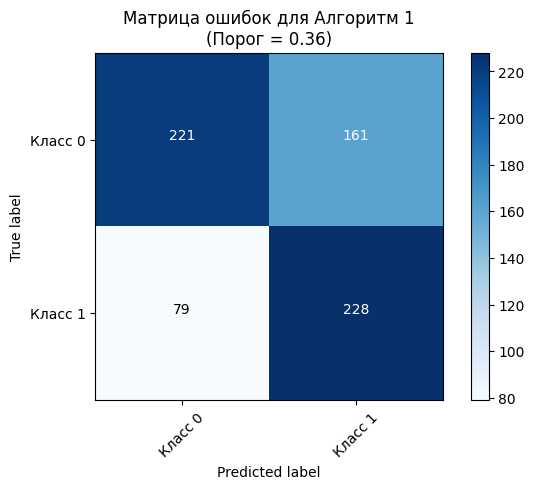

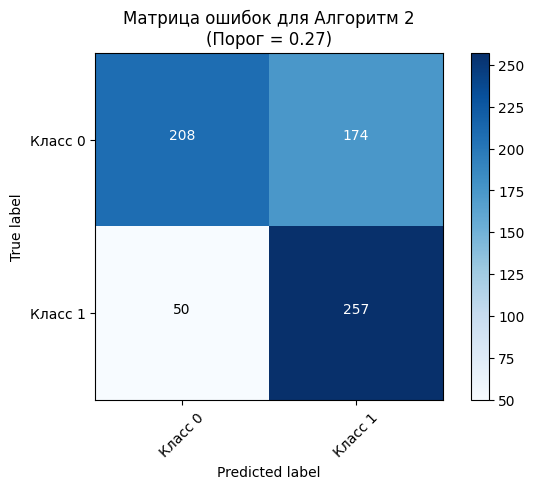


Для Алгоритм 3 подходящий порог не найден, матрица ошибок не строится.


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Определяем классы
class_names = ['Класс 0', 'Класс 1'] # Или просто [0, 1]


print("--- Матрицы ошибок для лучших порогов ---")

# Итерируем по результатам для каждого алгоритма
for i, algo_name in enumerate(algo_names):
    result = best_thresholds_results.get(algo_name) # Используем .get() для безопасности

    if result:
        threshold = result['threshold']
        probs = probs_list[i] # Получаем вероятности для текущего алгоритма

        # Вычисляем предсказания с использованием лучшего порога
        y_pred = (probs >= threshold).astype(int)

        # Вычисляем матрицу ошибок
        cnf_matrix = confusion_matrix(y_true, y_pred)
        np.set_printoptions(precision=2) # Для красивого вывода матрицы в консоль (опционально)

        # Строим и отображаем матрицу ошибок
        plt.figure() # Создаем новую фигуру для каждого графика
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title=f'Матрица ошибок для {algo_name}\n(Порог = {threshold:.2f})')
        plt.show()

    else:
        print(f"\nДля {algo_name} подходящий порог не найден, матрица ошибок не строится.")


**Выводы:** здесь напишите, какая модель лучше всего справилась с поставленной задачей.

Лучшей оказалась модель 1

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [43]:
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
import pandas as pd

# Убедимся, что df загружен (если нет, раскомментируйте строку ниже)
# df = pd.read_csv("credit_scoring_example1.csv") 

# Истинные метки
y_true = df['target']

# Вероятности для каждого алгоритма
probs_list = [df['pred1_probs'], df['pred2_probs'], df['pred3_probs']]
algo_names = ['Алгоритм 1', 'Алгоритм 2', 'Алгоритм 3']

# Диапазон порогов для проверки
thresholds = np.arange(0.1, 1.0, 0.01)

print("--- Лучшие пороги для Варианта 2 (Accuracy >= 0.65, Max Precision) ---")

# Словарь для хранения лучших результатов для каждого алгоритма
best_thresholds_precision = {}

# Проверяем каждый алгоритм
for i, probs in enumerate(probs_list):
    algo_name = algo_names[i]

    # Переменные для хранения лучшего результата для текущего алгоритма
    best_precision_for_algo = -1 # Инициализируем худшим возможным значением precision
    best_result_for_algo = None

    for threshold in thresholds:
        # Получаем предсказанные классы для текущего порога
        y_pred = (probs >= threshold).astype(int)

        # Вычисляем accuracy и precision (для класса 1)
        acc = accuracy_score(y_true, y_pred)
        # Добавляем zero_division=0, чтобы избежать ошибок/предупреждений, 
        # если нет предсказанных положительных классов (precision будет 0)
        prec = precision_score(y_true, y_pred, pos_label=1, zero_division=0)

        # Проверяем условие accuracy
        if acc >= 0.65:
            # Если текущая precision лучше лучшей найденной до сих пор
            # При равенстве precision, сохраняем первый найденный лучший порог (обычно это более низкий порог)
            # Если нужно предпочесть более высокий порог при равной precision, условие будет `prec >= best_precision_for_algo`
            if prec > best_precision_for_algo:
                best_precision_for_algo = prec # Обновляем лучшую precision
                # Сохраняем параметры этого порога
                best_result_for_algo = {'threshold': threshold, 'accuracy': acc, 'precision': prec}
            # Дополнительное условие: если precision такая же, но accuracy выше
            elif prec == best_precision_for_algo and best_result_for_algo and acc > best_result_for_algo['accuracy']:
                 best_result_for_algo = {'threshold': threshold, 'accuracy': acc, 'precision': prec}


    # Сохраняем лучший результат в общий словарь
    best_thresholds_precision[algo_name] = best_result_for_algo

# Выводим результаты
print("\n--- Найденные лучшие результаты (Вариант 2) ---")
for algo_name, result in best_thresholds_precision.items():
    if result:
        print(f"{algo_name}: Порог={result['threshold']:.2f}, Accuracy={result['accuracy']:.4f}, Precision={result['precision']:.4f}")
    else:
        print(f"{algo_name}: Подходящий порог (Accuracy >= 0.65) не найден.")


--- Лучшие пороги для Варианта 2 (Accuracy >= 0.65, Max Precision) ---

--- Найденные лучшие результаты (Вариант 2) ---
Алгоритм 1: Порог=0.54, Accuracy=0.6618, Precision=0.7372
Алгоритм 2: Порог=0.73, Accuracy=0.6502, Precision=0.8367
Алгоритм 3: Подходящий порог (Accuracy >= 0.65) не найден.


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

--- Матрицы ошибок для лучших порогов (Вариант 2: Max Precision при Acc >= 0.65) ---


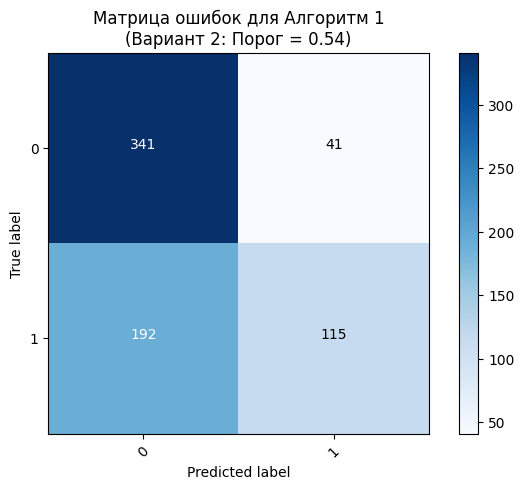

Построена матрица для Алгоритм 1 с порогом 0.54


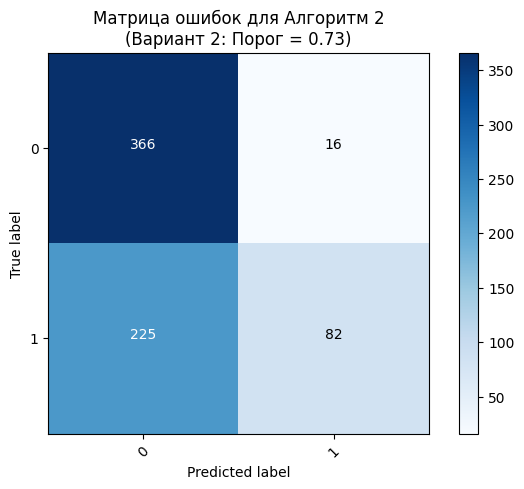

Построена матрица для Алгоритм 2 с порогом 0.73

Для Алгоритм 3 подходящий порог (Accuracy >= 0.65) не найден в Задании 7, матрица ошибок не строится.


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Определяем классы для отображения на графике
class_names = np.array(['0', '1']) 

print("--- Матрицы ошибок для лучших порогов (Вариант 2: Max Precision при Acc >= 0.65) ---")

# Итерируем по результатам для каждого алгоритма из Задания 7
for i, algo_name in enumerate(algo_names):
    # Получаем результат (словарь с порогом и метриками) для текущего алгоритма
    result = best_thresholds_precision.get(algo_name) 

    if result:
        threshold = result['threshold']
        probs = probs_list[i] # Получаем вероятности для текущего алгоритма

        # Вычисляем предсказания с использованием лучшего порога из Задания 7
        y_pred = (probs >= threshold).astype(int)

        # Вычисляем матрицу ошибок
        cnf_matrix = confusion_matrix(y_true, y_pred)
        np.set_printoptions(precision=2) # Для красивого вывода матрицы в консоль (опционально)

        # Строим и отображаем матрицу ошибок
        # Убедитесь, что функция plot_confusion_matrix доступна
        plt.figure() # Создаем новую фигуру для каждого графика
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title=f'Матрица ошибок для {algo_name}\n(Вариант 2: Порог = {threshold:.2f})')
        plt.show()
        print(f"Построена матрица для {algo_name} с порогом {threshold:.2f}")

    else:
        # Если для какого-то алгоритма порог не был найден в Задании 7
        print(f"\nДля {algo_name} подходящий порог (Accuracy >= 0.65) не найден в Задании 7, матрица ошибок не строится.")


Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [45]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd

# Убедимся, что df загружен
# df = pd.read_csv("credit_scoring_example1.csv") 

# Истинные метки
y_true = df['target']

# Вероятности для каждого алгоритма
probs_list = [df['pred1_probs'], df['pred2_probs'], df['pred3_probs']]
algo_names = ['Алгоритм 1', 'Алгоритм 2', 'Алгоритм 3']

# Диапазон порогов для проверки
thresholds = np.arange(0.01, 1.0, 0.01) # Начнем с 0.01 для большей гранулярности

print("--- Лучшие пороги для Варианта 3 (Max F1-score) ---")

# Словарь для хранения лучших результатов F1 для каждого алгоритма
best_thresholds_f1 = {}
max_f1_overall = -1
best_algo_f1 = ""

# Проверяем каждый алгоритм
for i, probs in enumerate(probs_list):
    algo_name = algo_names[i]

    # Переменные для хранения лучшего результата для текущего алгоритма
    best_f1_for_algo = -1 
    best_result_for_algo = None

    for threshold in thresholds:
        # Получаем предсказанные классы для текущего порога
        y_pred = (probs >= threshold).astype(int)

        # Вычисляем F1-score (для класса 1)
        # Используем pos_label=1 и zero_division=0
        f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

        # Если текущий F1 лучше лучшего найденного до сих пор для этого алгоритма
        if f1 > best_f1_for_algo:
            best_f1_for_algo = f1 # Обновляем лучший F1
            # Сохраняем параметры этого порога (включая другие метрики для информации)
            acc = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
            rec = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
            best_result_for_algo = {'threshold': threshold, 'f1': f1, 'accuracy': acc, 'precision': prec, 'recall': rec}
            
            # Проверяем, не является ли этот F1 лучшим в целом
            if f1 > max_f1_overall:
                max_f1_overall = f1
                best_algo_f1 = algo_name

    # Сохраняем лучший результат в общий словарь
    best_thresholds_f1[algo_name] = best_result_for_algo

# Выводим результаты
print("\n--- Найденные лучшие результаты (Вариант 3) ---")
for algo_name, result in best_thresholds_f1.items():
    if result:
        print(f"{algo_name}: Порог={result['threshold']:.2f}, F1={result['f1']:.4f} (Acc={result['accuracy']:.4f}, Prec={result['precision']:.4f}, Rec={result['recall']:.4f})")
    else:
        # Этого не должно произойти, т.к. F1 всегда можно вычислить (хотя бы 0)
        print(f"{algo_name}: Не удалось найти порог.")

print(f"\n--- Лучшая модель по F1-score ---")
if best_algo_f1:
    print(f"Лучший F1-score ({max_f1_overall:.4f}) достигнут моделью: {best_algo_f1} при пороге {best_thresholds_f1[best_algo_f1]['threshold']:.2f}")
else:
     print("Не удалось определить лучшую модель.")

--- Лучшие пороги для Варианта 3 (Max F1-score) ---

--- Найденные лучшие результаты (Вариант 3) ---
Алгоритм 1: Порог=0.34, F1=0.6720 (Acc=0.6430, Prec=0.5688, Rec=0.8208)
Алгоритм 2: Порог=0.32, F1=0.6990 (Acc=0.6851, Prec=0.6087, Rec=0.8208)
Алгоритм 3: Порог=0.15, F1=0.6443 (Acc=0.5530, Prec=0.4991, Rec=0.9088)

--- Лучшая модель по F1-score ---
Лучший F1-score (0.6990) достигнут моделью: Алгоритм 2 при пороге 0.32


#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [46]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [54]:
df_credit = pd.read_csv("credit_scoring_example1.csv") 
df_credit.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
import numpy as np


# --- Исключение ненужных столбцов ---
# Находим столбцы, начинающиеся с 'pred' и содержащие '_classes' или '_probs'
cols_to_drop = [col for col in df_credit.columns if col.startswith('pred') and ('_classes' in col or '_probs' in col)]

if cols_to_drop:
    print(f"\nИсключаю столбцы: {cols_to_drop}")
    # Удаляем найденные столбцы из DataFrame
    df_credit = df_credit.drop(columns=cols_to_drop)
    print("Столбцы исключены.")
    print("Новый размер датасета:", df_credit.shape) # Показать новый размер
else:
    # Сообщение, если таких столбцов нет
    print("\nСтолбцы для исключения (pred*_classes, pred*_probs) не найдены.")


target_column = 'target' 

if target_column not in df_credit.columns:
     print(f"Ошибка: Целевая колонка '{target_column}' не найдена в DataFrame.")
     print("Доступные колонки:", df_credit.columns.tolist())
     # Остановите выполнение или выберите другую колонку
     raise ValueError(f"Целевая колонка '{target_column}' не найдена.")

X = df_credit.drop(target_column, axis=1)
y = df_credit[target_column]

# Определение числовых и категориальных признаков (автоматически)
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"\nЦелевая переменная: {target_column}")
print(f"\nЧисловые признаки ({len(numerical_features)}): {numerical_features}")
print(f"\nКатегориальные признаки ({len(categorical_features)}): {categorical_features}")


# --- 3. Предобработка данных и создание пайплайна ---

# Пайплайн для числовых признаков:
# 1. Заполнение пропусков средним значением
# 2. Масштабирование данных
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных признаков:
# 1. Заполнение пропусков наиболее частым значением
# 2. One-Hot кодирование
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' для обработки новых категорий в тесте
])

# Создание препроцессора с помощью ColumnTransformer
# Применяем соответствующие пайплайны к нужным колонкам
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 4. Создание и обучение модели ---

# Создание полного пайплайна: сначала предобработка, затем модель
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LogisticRegression(solver='liblinear', random_state=42)) # Используем 'liblinear' для простоты
                      ])

# --- 5. Разделение на обучающую и тестовую выборки ---
# random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y важен для несбалансированных классов

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# --- 6. Обучение модели ---
print("\nОбучение модели...")
model.fit(X_train, y_train)
print("Модель обучена.")

# --- 7. Оценка модели ---
print("\nОценка модели на тестовой выборке:")
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Вероятности для класса 1

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}") # ROC AUC важен для задач классификации

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 8. Пример предсказания для новых данных (опционально) ---
# Создайте DataFrame с новыми данными, структура которого совпадает с X_train
# new_data = pd.DataFrame(...) 
# predictions = model.predict(new_data)
# probabilities = model.predict_proba(new_data)



Исключаю столбцы: ['pred1_probs', 'pred1_classes', 'pred2_probs', 'pred2_classes', 'pred3_probs', 'pred3_classes']
Столбцы исключены.
Новый размер датасета: (689, 15)

Целевая переменная: target

Числовые признаки (14): ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

Категориальные признаки (0): []

Размер обучающей выборки: (551, 14)
Размер тестовой выборки: (138, 14)

Обучение модели...
Модель обучена.

Оценка модели на тестовой выборке:

Accuracy: 0.8841
ROC AUC: 0.9374

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        77
           1       0.83      0.93      0.88        61

    accuracy                           0.88       138
   macro avg       0.88      0.89      0.88       138
weighted avg       0.89      0.88      0.88       138



**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?


--- Задание 11: Подбор оптимального порога ---

а) Максимизация точности (Precision):
   - Оптимальный порог: 0.995
   - Максимальная точность: 1.0000
   - Полнота при этом пороге: 0.0328
   - F1 при этом пороге: 0.0635

б) Максимизация полноты (Recall):
   - Оптимальный порог: 0.000
   - Максимальная полнота: 1.0000
   - Точность при этом пороге: 0.4420
   - F1 при этом пороге: 0.6131

в) Максимизация F1-score:
   - Оптимальный порог: 0.640
   - Максимальный F1-score: 0.8793
   - Точность при этом пороге: 0.9273
   - Полнота при этом пороге: 0.8361


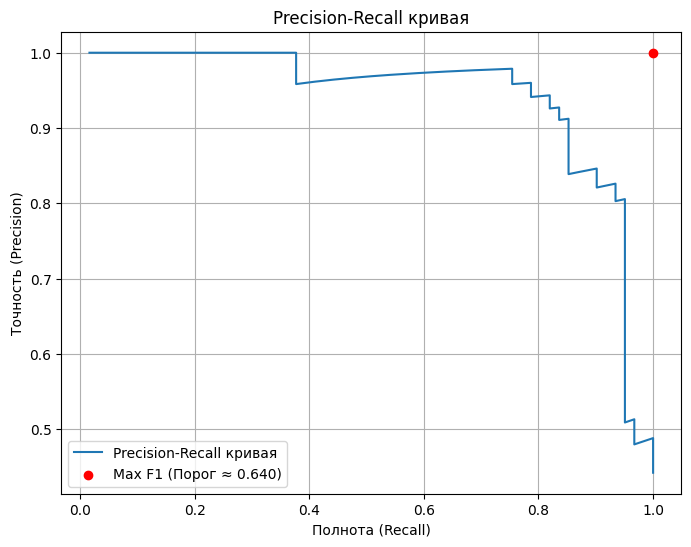

In [59]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Предполагаем, что y_test и y_pred_proba доступны из предыдущей ячейки
# y_pred_proba - это вероятности для положительного класса (например, model.predict_proba(X_test)[:, 1])

# Проверка наличия переменных (на всякий случай)
if 'y_test' not in locals() or 'y_pred_proba' not in locals():
    print("Ошибка: Переменные y_test и/или y_pred_proba не найдены.")
    print("Убедитесь, что ячейка с обучением модели была выполнена перед этой.")
    # Можно остановить выполнение, если переменных нет
    # raise NameError("Необходимые переменные не найдены")
else:
    print("\n--- Задание 11: Подбор оптимального порога ---")

    # Создаем массив порогов для проверки
    # Вместо linspace, можно использовать уникальные вероятности для точности
    # thresholds = np.sort(np.unique(y_pred_proba)) 
    # Но для простоты и покрытия диапазона [0, 1] используем linspace
    thresholds = np.linspace(0.0, 1.0, 201) # Более мелкий шаг для большей точности

    # Инициализируем переменные для хранения лучших результатов
    best_precision_threshold = 0.5 # Начнем с дефолтного порога
    best_precision = precision_score(y_test, (y_pred_proba >= 0.5).astype(int), zero_division=0)
    
    best_recall_threshold = 0.5
    best_recall = recall_score(y_test, (y_pred_proba >= 0.5).astype(int), zero_division=0)
    
    best_f1_threshold = 0.5
    best_f1 = f1_score(y_test, (y_pred_proba >= 0.5).astype(int), zero_division=0)

    precisions = []
    recalls = []
    f1s = []

    # Перебираем пороги
    for threshold in thresholds:
        # Переводим вероятности в классы с текущим порогом
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)

        # Рассчитываем метрики
        precision = precision_score(y_test, y_pred_threshold, zero_division=0)
        recall = recall_score(y_test, y_pred_threshold, zero_division=0)
        f1 = f1_score(y_test, y_pred_threshold, zero_division=0)
        
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

        # Обновляем лучшие результаты
        # Приоритет отдаем более высокому порогу при равных метриках (для precision)
        if precision >= best_precision: 
             if precision > best_precision: # Если точность строго выше, обновляем
                 best_precision = precision
                 best_precision_threshold = threshold
             elif threshold > best_precision_threshold: # Если точность равна, берем больший порог
                 best_precision_threshold = threshold

        # Приоритет отдаем более низкому порогу при равных метриках (для recall)
        if recall >= best_recall:
            if recall > best_recall: # Если полнота строго выше, обновляем
                 best_recall = recall
                 best_recall_threshold = threshold
            elif threshold < best_recall_threshold: # Если полнота равна, берем меньший порог
                 best_recall_threshold = threshold

        # Для F1 обычно ищут просто максимум
        if f1 >= best_f1:
             if f1 > best_f1: # Если F1 строго выше, обновляем
                 best_f1 = f1
                 best_f1_threshold = threshold
             # Можно добавить логику выбора порога при равенстве F1, если нужно 
             # (например, выбрать порог ближе к 0.5 или тот, что дает лучший recall/precision)


    print(f"\nа) Максимизация точности (Precision):")
    print(f"   - Оптимальный порог: {best_precision_threshold:.3f}")
    print(f"   - Максимальная точность: {best_precision:.4f}")
    print(f"   - Полнота при этом пороге: {recall_score(y_test, (y_pred_proba >= best_precision_threshold).astype(int), zero_division=0):.4f}")
    print(f"   - F1 при этом пороге: {f1_score(y_test, (y_pred_proba >= best_precision_threshold).astype(int), zero_division=0):.4f}")


    print(f"\nб) Максимизация полноты (Recall):")
    print(f"   - Оптимальный порог: {best_recall_threshold:.3f}")
    print(f"   - Максимальная полнота: {best_recall:.4f}")
    print(f"   - Точность при этом пороге: {precision_score(y_test, (y_pred_proba >= best_recall_threshold).astype(int), zero_division=0):.4f}")
    print(f"   - F1 при этом пороге: {f1_score(y_test, (y_pred_proba >= best_recall_threshold).astype(int), zero_division=0):.4f}")

    print(f"\nв) Максимизация F1-score:")
    print(f"   - Оптимальный порог: {best_f1_threshold:.3f}")
    print(f"   - Максимальный F1-score: {best_f1:.4f}")
    print(f"   - Точность при этом пороге: {precision_score(y_test, (y_pred_proba >= best_f1_threshold).astype(int), zero_division=0):.4f}")
    print(f"   - Полнота при этом пороге: {recall_score(y_test, (y_pred_proba >= best_f1_threshold).astype(int), zero_division=0):.4f}")

    # Дополнительно: Построим кривую Precision-Recall
    precisions_curve, recalls_curve, thresholds_curve = precision_recall_curve(y_test, y_pred_proba)
    
    # Найдем порог, ближайший к оптимальному F1 найденному ранее (т.к. precision_recall_curve может не включать его точно)
    # f1_curve = 2 * (precisions_curve * recalls_curve) / (precisions_curve + recalls_curve + 1e-9) # +1e-9 чтобы избежать деления на 0
    # idx_best_f1_curve = np.argmax(f1_curve[:-1]) # Исключаем последний элемент, где recall=0
    
    # Визуализация (добавьте plt.show() если не используете %matplotlib inline)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.plot(recalls_curve[:-1], precisions_curve[:-1], label='Precision-Recall кривая') # Исключаем последнюю точку (recall=0, precision=1)
    plt.scatter(best_recall, best_precision, marker='o', color='red', label=f'Max F1 (Порог ≈ {best_f1_threshold:.3f})', zorder=5)
    # plt.scatter(recalls_curve[idx_best_f1_curve], precisions_curve[idx_best_f1_curve], marker='x', color='red', label=f'Max F1 из кривой (Порог ≈ {thresholds_curve[idx_best_f1_curve]:.3f})', zorder=5)
    plt.xlabel('Полнота (Recall)')
    plt.ylabel('Точность (Precision)')
    plt.title('Precision-Recall кривая')
    plt.grid(True)
    plt.legend()
    plt.show() # Если необходимо
